In [123]:
import pandas as pd
import numpy as np
import seaborn as sb
from sklearn.preprocessing import LabelEncoder
%matplotlib inline

In [124]:
data = pd.read_csv('loanPredictiontrain.csv')
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [125]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [126]:
data.Property_Area.value_counts()

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

In [127]:
data.Credit_History.value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

In [128]:
data.Loan_Status.value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

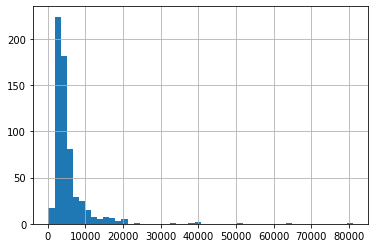

In [129]:
data.ApplicantIncome.hist(bins= 50)

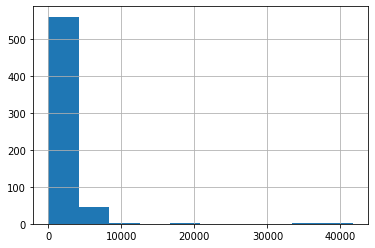

In [130]:
data.CoapplicantIncome.hist()

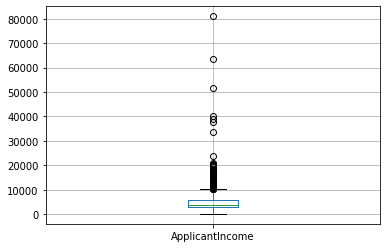

In [131]:
data.boxplot(column='ApplicantIncome')

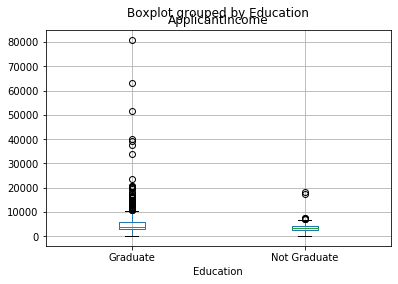

In [132]:
data.boxplot('ApplicantIncome' , by='Education')

In [133]:
temp = data.Credit_History.value_counts()

In [134]:
temp2 = data.pivot_table(values='Loan_Status' , index=['Credit_History'],aggfunc=lambda x:x.map({'Y':1,'N':0}).mean())

temp2

In [135]:
temp2

,Loan_Status
Credit_History,
0.0,0.078652
1.0,0.795789


In [136]:
#data Munging
data.LoanAmount.fillna(data.LoanAmount.mean() , inplace=True)

In [137]:
data.Self_Employed.value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

In [138]:
data.Self_Employed.fillna('No' , inplace=True)

In [139]:
table = data.pivot_table('LoanAmount' , index='Self_Employed' , columns='Education',aggfunc=np.median)

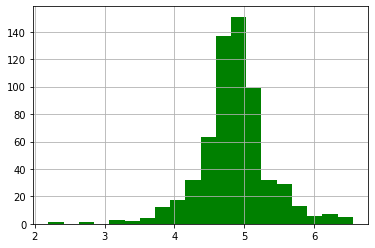

In [140]:
data_loanamt_log = np.log(data.LoanAmount)
data_loanamt_log.hist(bins=20 , color='green')

In [141]:
data['toatal_income'] = data['ApplicantIncome'] +  data['CoapplicantIncome']

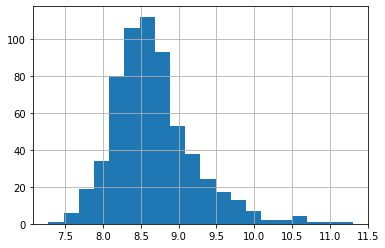

In [142]:
loginc = np.log(data['toatal_income'])
loginc.hist(bins=20)

In [143]:
data.Gender.mode()[0]

'Male'

In [144]:
data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
toatal_income         0
dtype: int64

In [145]:
data.Gender.fillna(data.Gender.mode()[0], inplace = True)
data.Married.fillna(data.Married.mode()[0] , inplace = True)
data.Loan_Amount_Term.fillna(data.Loan_Amount_Term.mode()[0], inplace =True)
data.Credit_History.fillna(data.Credit_History.mode()[0] , inplace=True)
data.Dependents.fillna(data.Dependents.mode()[0] , inplace=True)

In [146]:
data.Dependents.value_counts()

0     360
1     102
2     101
3+     51
Name: Dependents, dtype: int64

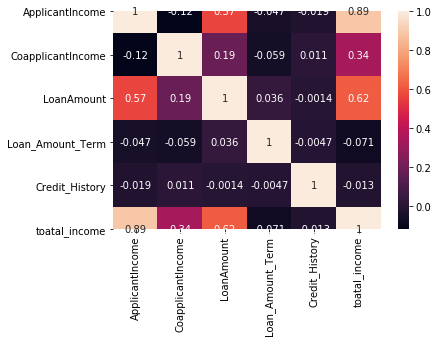

In [147]:
data.columns
sb.heatmap(data.corr(),annot=True)

In [149]:
data_label = data

In [150]:
data_label.iloc[:,[1,2,4,5,11,12]]
enc = LabelEncoder()
#data[['Gender','Married','Education','Self_Employed','Property_Area','Loan_Status']].apply(enc.fit_transform())

data_label.iloc[:,[1,2,4,5,11,12]] = data_label.iloc[:,[1,2,4,5,11,12]].apply(enc.fit_transform)
data_label

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,toatal_income
0,LP001002,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,2,1,5849.0
1,LP001003,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0,0,6091.0
2,LP001005,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,2,1,3000.0
3,LP001006,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,2,1,4941.0
4,LP001008,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,2,1,6000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,0,0,0,0,0,2900,0.0,71.000000,360.0,1.0,0,1,2900.0
610,LP002979,1,1,3+,0,0,4106,0.0,40.000000,180.0,1.0,0,1,4106.0
611,LP002983,1,1,1,0,0,8072,240.0,253.000000,360.0,1.0,2,1,8312.0
612,LP002984,1,1,2,0,0,7583,0.0,187.000000,360.0,1.0,2,1,7583.0


In [152]:
X = data_label[['Self_Employed','LoanAmount','Loan_Amount_Term','Education','Credit_History','toatal_income']]
y = data_label.Loan_Status

In [66]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

In [153]:
model = RandomForestClassifier(n_estimators=101 , random_state=10,max_depth = 16)
score = cross_val_score(model,X,y,cv=5)

In [155]:
score.mean()

0.776889244302279

In [163]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(X,y,random_state=10)
model2 = RandomForestClassifier(n_estimators=51,max_depth=16, random_state=15)
model.fit(xtrain,ytrain)
ypred = model.predict(xtest)
accuracy_score(ytest,ypred)

0.7792207792207793